In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('News.csv',index_col=0) 
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [5]:
data.shape

(44919, 5)

In [6]:
data = data.drop(["title", "subject","date"], axis = 1)

In [8]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [9]:
data = data.sample(frac=1) 
data.reset_index(inplace=True) 
data.drop(["index"], axis=1, inplace=True) 

<Axes: xlabel='class', ylabel='count'>

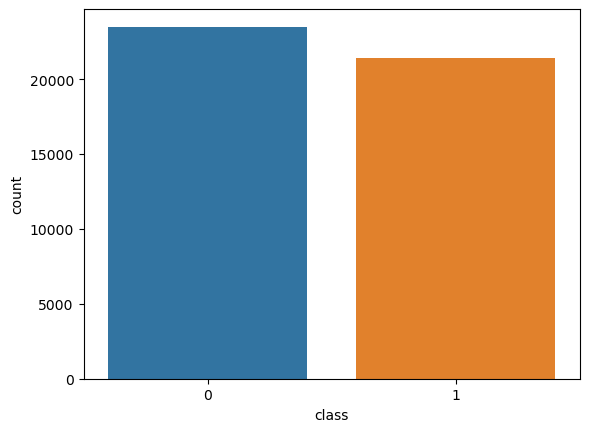

In [10]:
sns.countplot(data=data, 
              x='class', 
              order=data['class'].value_counts().index)

In [10]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/300.2 kB 573.4 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 774.0 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/300.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------- ------- 245.8/300.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 929.2 kB/s eta 0:00:00


In [11]:
from tqdm import tqdm 
import re 
import nltk 
nltk.download('punkt') 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer 
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def preprocess_text(text_data): 
	preprocessed_text = [] 
	
	for sentence in tqdm(text_data): 
		sentence = re.sub(r'[^\w\s]', '', sentence) 
		preprocessed_text.append(' '.join(token.lower() 
								for token in str(sentence).split() 
								if token not in stopwords.words('english'))) 

	return preprocessed_text


In [13]:
preprocessed_review = preprocess_text(data['text'].values) 
data['text'] = preprocessed_review

100%|██████████████████████████████████████████████████████████████████████████| 44919/44919 [1:09:53<00:00, 10.71it/s]


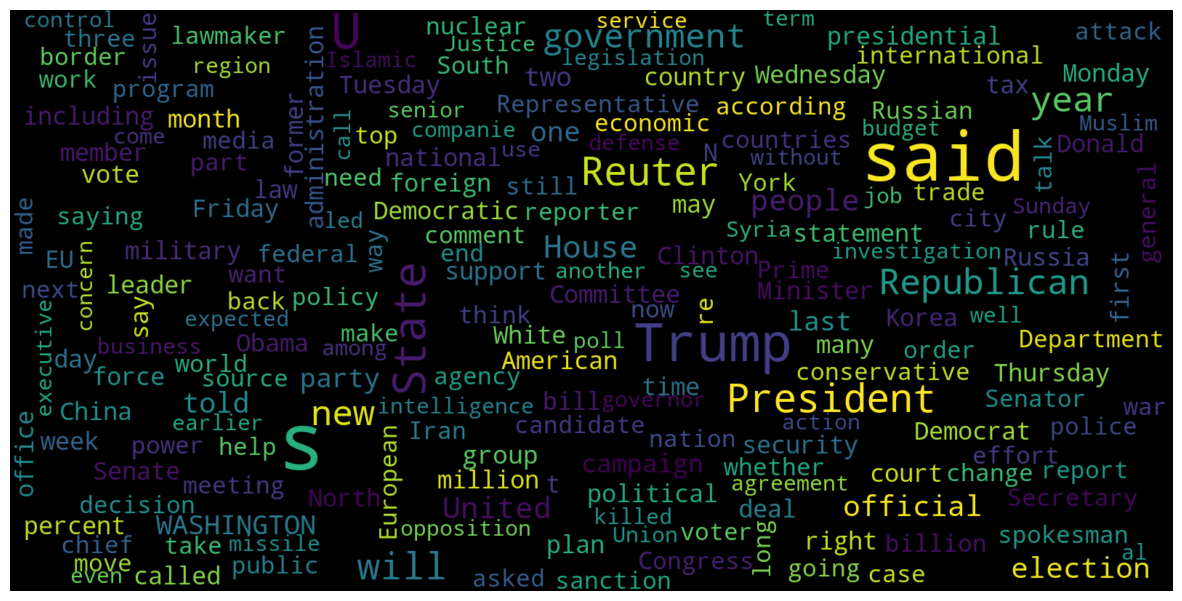

In [13]:
# Real 
consolidated = ' '.join( 
	word for word in data['text'][data['class'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, 
					height=800, 
					random_state=21, 
					max_font_size=110, 
					collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 


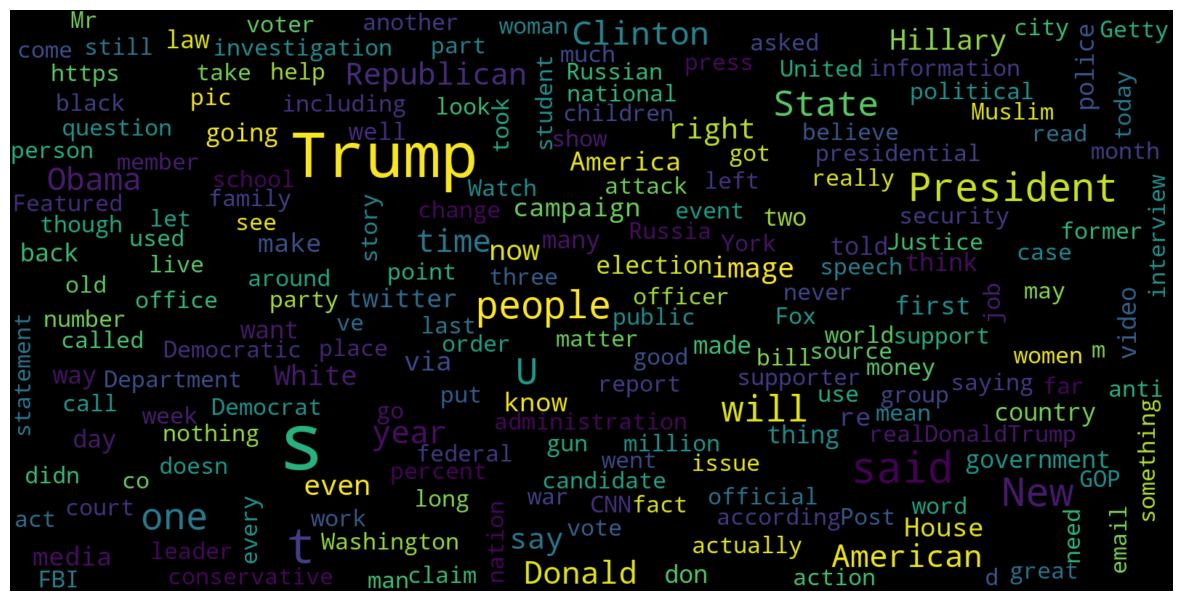

In [14]:
# Fake 
consolidated = ' '.join( 
	word for word in data['text'][data['class'] == 0].astype(str)) 
wordCloud = WordCloud(width=1600, 
					height=800, 
					random_state=21, 
					max_font_size=110, 
					collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 


<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

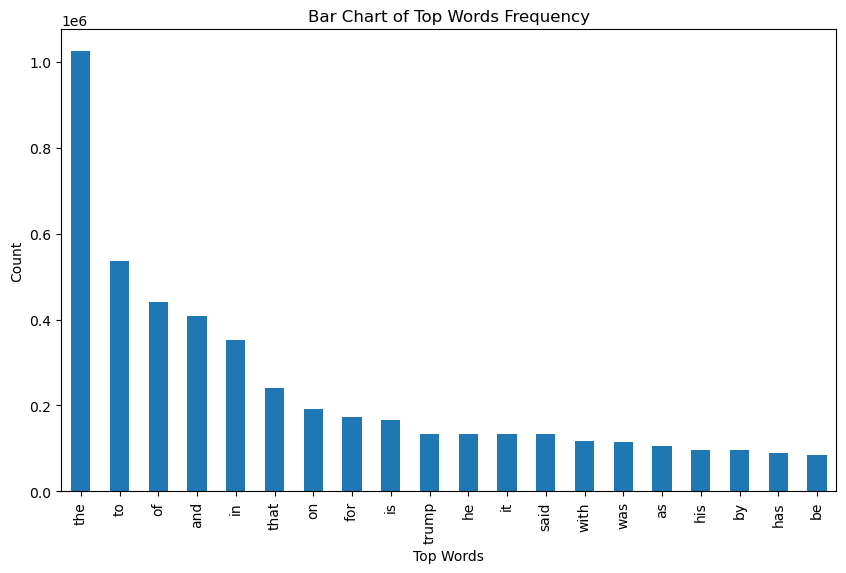

In [15]:
from sklearn.feature_extraction.text import CountVectorizer 


def get_top_n_words(corpus, n=None): 
	vec = CountVectorizer().fit(corpus) 
	bag_of_words = vec.transform(corpus) 
	sum_words = bag_of_words.sum(axis=0) 
	words_freq = [(word, sum_words[0, idx]) 
				for word, idx in vec.vocabulary_.items()] 
	words_freq = sorted(words_freq, key=lambda x: x[1], 
						reverse=True) 
	return words_freq[:n] 


common_words = get_top_n_words(data['text'], 20) 
df1 = pd.DataFrame(common_words, columns=['Review', 'count']) 

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot( 
	kind='bar', 
	figsize=(10, 6), 
	xlabel="Top Words", 
	ylabel="Count", 
	title="Bar Chart of Top Words Frequency"
) 


In [17]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 

x_train, x_test, y_train, y_test = train_test_split(data['text'], 
													data['class'], 
													test_size=0.25)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer 

vectorization = TfidfVectorizer() 
x_train = vectorization.fit_transform(x_train) 
x_test = vectorization.transform(x_test)


In [19]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression() 
model.fit(x_train, y_train) 

# testing the model 
print(accuracy_score(y_train, model.predict(x_train))) 
print(accuracy_score(y_test, model.predict(x_test))) 


0.9914512155302918
0.9871772039180766


In [20]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier() 
model.fit(x_train, y_train) 

# testing the model 
print(accuracy_score(y_train, model.predict(x_train))) 
print(accuracy_score(y_test, model.predict(x_test))) 


0.9999703167205913
0.9965271593944791


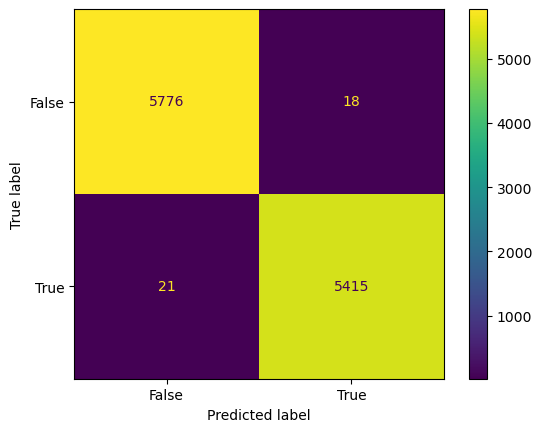

In [21]:
# Confusion matrix of Results from Decision Tree classification 
from sklearn import metrics 
cm = metrics.confusion_matrix(y_test, model.predict(x_test)) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
											display_labels=[False, True]) 

cm_display.plot() 
plt.show() 


In [24]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in text_data:
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                           for token in word_tokenize(sentence)
                                           if token.lower() not in stopwords.words('english')))

    return preprocessed_text

# Assuming 'model' contains the trained Logistic Regression model
# Assuming 'vectorization' contains the trained TfidfVectorizer

# Example news text
example_news = "Trump Just Admitted He Knew Flynn Lied To The FBI Before He Asked Comey To Drop The Investigation"

# Preprocess the example news text
preprocessed_example_news = preprocess_text([example_news])

# Vectorize the preprocessed news text using the trained TfidfVectorizer
vectorized_example_news = vectorization.transform(preprocessed_example_news)

# Predict the class (0 for fake, 1 for real) using the trained Logistic Regression model
prediction = model.predict(vectorized_example_news)

# Interpret the prediction
if prediction[0] == 1:
    print("The news is predicted to be fake.")
else:
    print("The news is predicted to be real.")

The news is predicted to be real.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
